<a href="https://colab.research.google.com/github/Sakshi1007/MLnow_2.0/blob/main/3_1_EDA%26Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


**`Univariate Linear Regression`**

[Link to Download the dataset](https://www.kaggle.com/hesh97/titanicdataset-traincsv)

**Date Created**: June 8, 2021

**Author**:
Sakshi Singh

[[Course Repository](https://https://github.com/Sakshi1007/MLnow_2.0)]



## Setup

In [300]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [301]:
cd '/content/drive/MyDrive/ColabNotebooks/MLnow()'

/content/drive/MyDrive/ColabNotebooks/MLnow()


In [302]:
ls

ClaenMathData.csv  train.csv  univariate_MathData_2.csv


In [303]:
import os

In [304]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [305]:
mathData = pd.DataFrame(pd.read_csv('train.csv'))#load the csv file as dataframe


In [306]:
mathData.head(10) #print the first ten rows of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [307]:
mathData.shape

(891, 12)

In [308]:
mathData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Drop the column which are not necessary during prediction as well as it have ore than 35% Null values**

In [309]:
drop_column=mathData.isnull().sum()[mathData.isnull().sum()>(35/100*mathData.shape[0])]
drop_column

Cabin    687
dtype: int64

**Cabin will doesn't matter to know that whether person will survive or not, So we will drop this column**

In [310]:
drop_column.index

Index(['Cabin'], dtype='object')

In [311]:
mathData.drop(drop_column.index,axis=1,inplace=True)
mathData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [312]:
mathData.fillna(mathData.mean(),inplace=True)
mathData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [313]:
mathData['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [314]:
mathData['Embarked'].fillna('S',inplace=True)

In [315]:
mathData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [316]:
#unique classes/categories in every column 

# variable.column.unique() --> all {column} values from the {variable} dataframe and print out the unique ones. 


print(f'Survived: {mathData.Survived.unique()}')
print(f'SEX: {mathData.Sex.unique()}')
print(f'Pclass: {mathData.Pclass.unique()}')
print(f'SibSP: {mathData.SibSp.unique()}')
print(f'Parch: {mathData.Parch.unique()}')
print(f'Embarked: {mathData.Embarked.unique()}')

Survived: [0 1]
SEX: ['male' 'female']
Pclass: [3 1 2]
SibSP: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q']


In [317]:
mathData.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [318]:
mathData['FamilySize']=mathData['SibSp']+mathData['Parch']
mathData.drop(['SibSp','Parch'],axis=1,inplace=True)
mathData.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


In [319]:
mathData['FamilySize'] = mathData['FamilySize'].apply({1:1, 0:0, 4:1, 2:1, 6:1, 5:1, 3:1, 7:1, 10:1}.get)
mathData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,C,1


In [320]:
mathData['Alone']=[0 if mathData['FamilySize'][i]<=0 else 1 for i in mathData.index]
mathData.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0,0
5,6,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,S,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,S,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,C,1,1


In [321]:
mathData.groupby(['Alone'])['Survived'].mean()

Alone
0    0.303538
1    0.505650
Name: Survived, dtype: float64

In [322]:
mathData[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,0.271832
Fare,0.271832,1.000000


In [323]:
mathData['Sex'] = mathData['Sex'].apply({'male':1, 'female':0}.get)
mathData['Embarked'] = mathData['Embarked'].apply({'S':1, 'C':2, 'Q':3}.get)
mathData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,A/5 21171,7.2500,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,PC 17599,71.2833,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,STON/O2. 3101282,7.9250,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,113803,53.1000,1,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,373450,8.0500,1,0,0
5,6,0,3,"Moran, Mr. James",1,29.699118,330877,8.4583,3,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,17463,51.8625,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,349909,21.0750,1,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,347742,11.1333,1,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,237736,30.0708,2,1,1


In [324]:
mathData.groupby(['Sex'])['Survived'].mean()

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64

In [325]:
mathData.groupby(['Embarked'])['Survived'].mean()

Embarked
1    0.339009
2    0.553571
3    0.389610
Name: Survived, dtype: float64

In [326]:
mathData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,A/5 21171,7.2500,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,PC 17599,71.2833,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,STON/O2. 3101282,7.9250,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,113803,53.1000,1,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,373450,8.0500,1,0,0
5,6,0,3,"Moran, Mr. James",1,29.699118,330877,8.4583,3,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,17463,51.8625,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,349909,21.0750,1,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,347742,11.1333,1,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,237736,30.0708,2,1,1


In [327]:
print(f'Survived: {mathData.Survived.unique()}')
print(f'SEX: {mathData.Sex.unique()}')
print(f'Pclass: {mathData.Pclass.unique()}')
print(f'Alone: {mathData.Alone.unique()}')
print(f'FamilySize: {mathData.FamilySize.unique()}')
print(f'Embarked: {mathData.Embarked.unique()}')

Survived: [0 1]
SEX: [1 0]
Pclass: [3 1 2]
Alone: [1 0]
FamilySize: [1 0]
Embarked: [1 2 3]


In [328]:
#columns to be considered
mathData=mathData[['PassengerId','Survived','Pclass','Name','Sex','Fare','FamilySize','Alone']]
mathData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Fare,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",1,8.0500,0,0
5,6,0,3,"Moran, Mr. James",1,8.4583,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,51.8625,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,21.0750,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,11.1333,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,30.0708,1,1


In [329]:
mathData.to_csv('ClaenMathData.csv') #exporting the file

In [330]:
ls

ClaenMathData.csv  train.csv  univariate_MathData_2.csv


**VISUALIZATION**

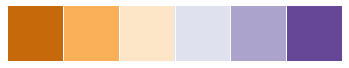

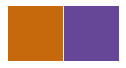

In [331]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [332]:
print(f'''There are {len(mathData.columns)} columns in the dataframe mathData namely,

{mathData.columns}''') #columns in the dataframe

There are 8 columns in the dataframe mathData namely,

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Fare',
       'FamilySize', 'Alone'],
      dtype='object')


A pairplot is a plot where the `x` axis and `y` axis will have all the columns you specify it with

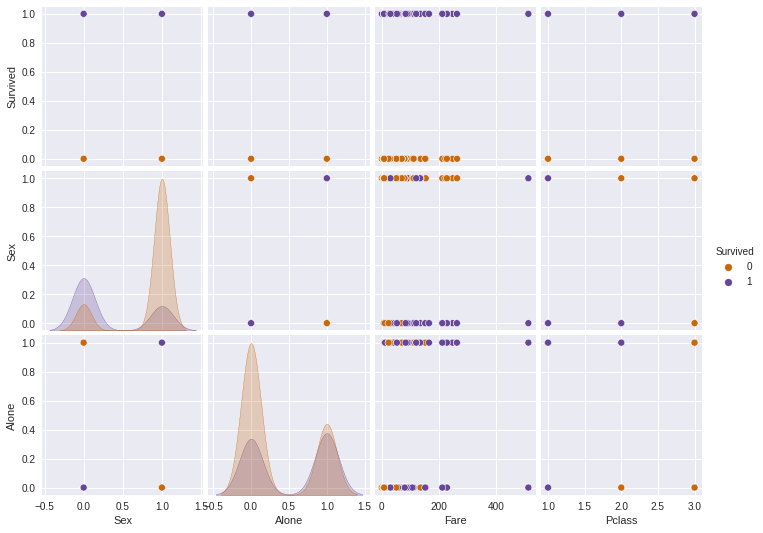

In [333]:
sns.pairplot(mathData,
             x_vars = [ 'Sex','Alone','Fare', 'Pclass' ],
             y_vars = [ 'Survived','Sex','Alone'],
       diag_kind='kde', hue='Survived'
             )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


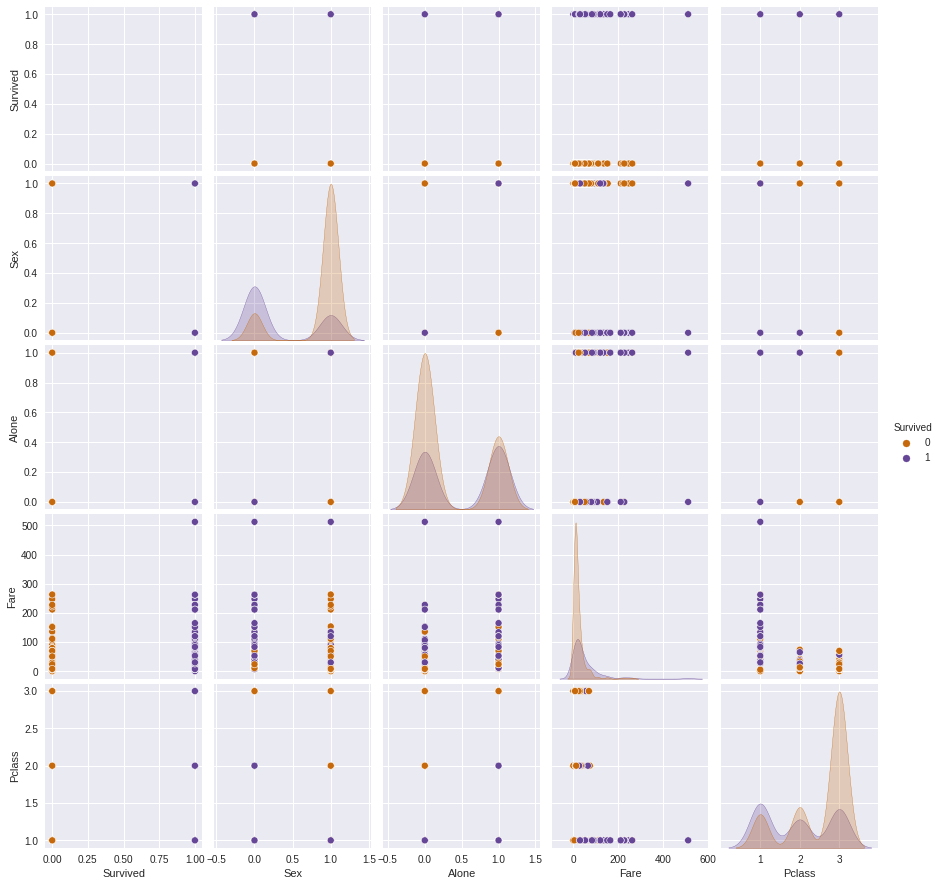

In [334]:
sns.pairplot(mathData,
             x_vars = [ 'Survived','Sex','Alone','Fare', 'Pclass' ],
             y_vars = [ 'Survived','Sex','Alone','Fare', 'Pclass'],
       diag_kind='kde', hue='Survived'
             )

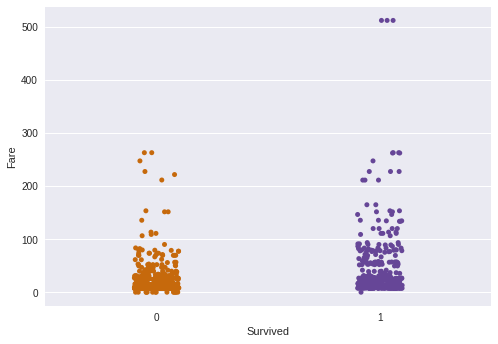

In [335]:
sns.stripplot(y='Fare', x='Survived', data=mathData)

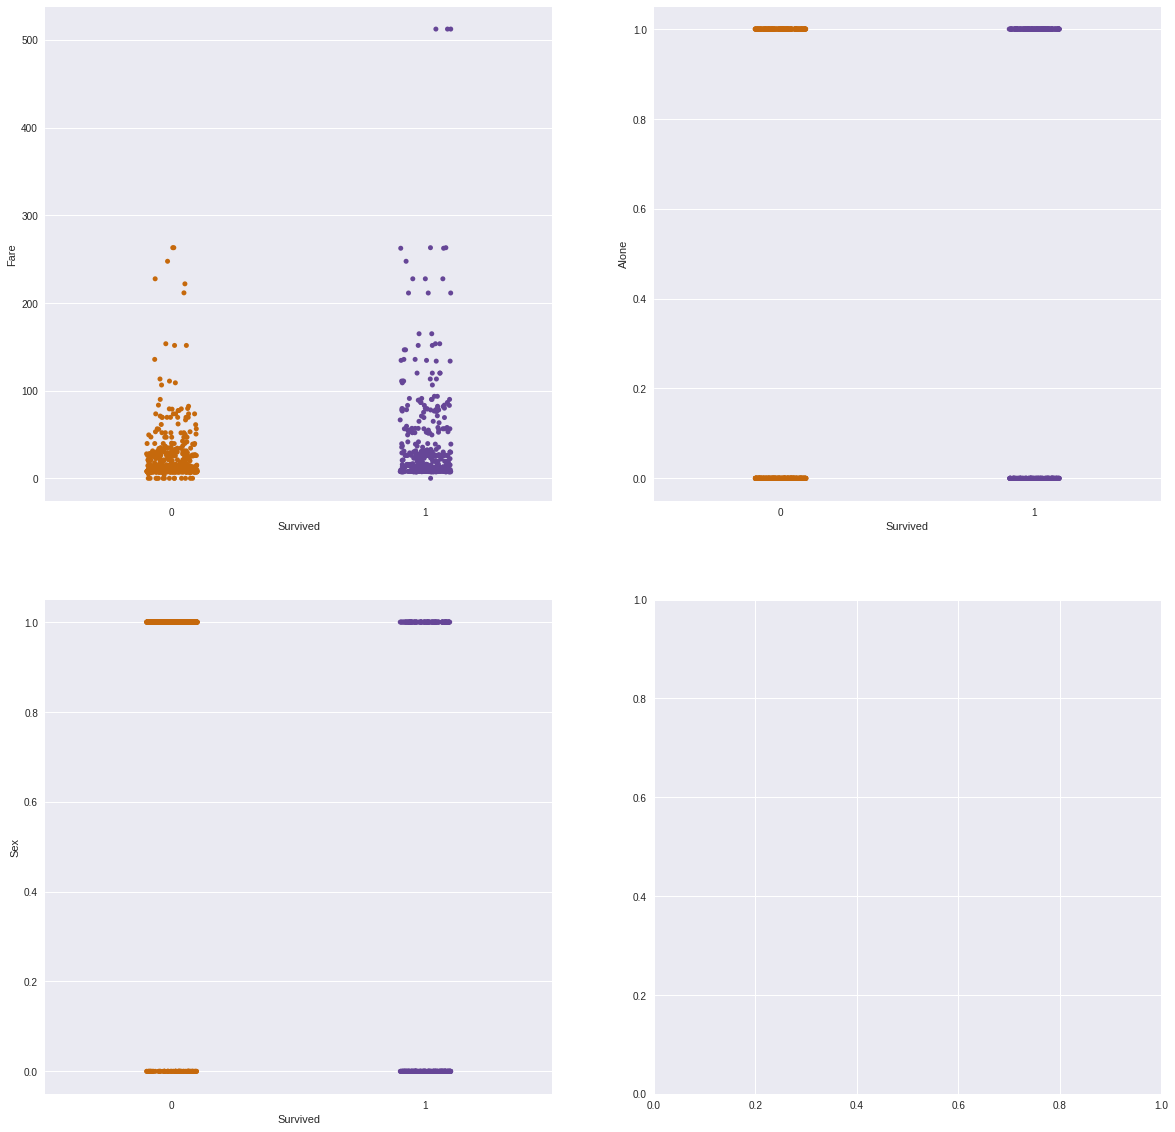

In [336]:
fig, axarr = plt.subplots(2,2, figsize=(20,20))

#three rows and 2 columns all starting from (0,0)

sns.stripplot(y='Fare', x='Survived', data=mathData, hue=None, ax=axarr[0][0])
sns.stripplot(y='Sex', x='Survived', data=mathData, hue=None, ax=axarr[1][0])
sns.stripplot(y='Alone', x='Survived', data=mathData, hue=None, ax=axarr[0][1])

In [337]:
uniMathData = mathData[['Fare', 'Survived']]

uniMathData.head(5)


,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,0


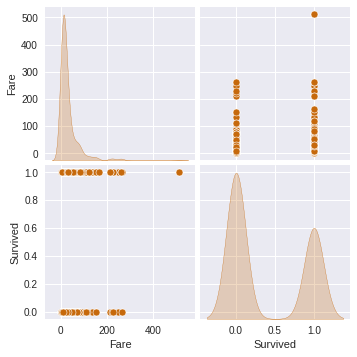

In [338]:
sns.pairplot(uniMathData,
             x_vars = ['Fare', 'Survived'],
             y_vars =  ['Fare', 'Survived'],
             
       diag_kind='kde'
             )

In [339]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [340]:
ls

ClaenMathData.csv  train.csv  univariate_MathData_2.csv


**DATA SPLIT**


In [341]:
trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

         Fare  Survived
495   14.4583         0
648    7.5500         0
278   29.1250         0
31   146.5208         1
255   15.2458         1
       Fare  Survived
9   30.0708         1
11  26.5500         1
19   7.2250         1
23  35.5000         1
28   7.8792         1


In [342]:
print(trainDataset.shape)
print(testDataset.shape)

(713, 2)
(178, 2)


In [343]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

         Fare  Survived
495   14.4583         0
648    7.5500         0
278   29.1250         0
31   146.5208         1
255   15.2458         1
       Fare  Survived
9   30.0708         1
11  26.5500         1
19   7.2250         1
23  35.5000         1
28   7.8792         1


In [344]:

trainLabels = trainFeatures.pop('Fare')
testLabels = testFeatures.pop('Fare')

print(trainLabels.head())
print(testLabels.head())

495     14.4583
648      7.5500
278     29.1250
31     146.5208
255     15.2458
Name: Fare, dtype: float64
9     30.0708
11    26.5500
19     7.2250
23    35.5000
28     7.8792
Name: Fare, dtype: float64


In [345]:
print(trainFeatures.head())
print(testFeatures.head())

     Survived
495         0
648         0
278         0
31          1
255         1
    Survived
9          1
11         1
19         1
23         1
28         1


In [346]:
print(testFeatures.shape)

(178, 1)


In [347]:
uniMathData.columns

Index(['Fare', 'Survived'], dtype='object')

In [348]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [349]:
model.compile(
    loss='mean_absolute_error',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.1,nesterov=False,name="SGD"),
    metrics=['mae','mse']
)

In [350]:
uniMathData.shape

(891, 2)

In [351]:
numEpochs = 600
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/600
23/23 [==============================] - 0s 7ms/step - loss: 31.4760 - mae: 31.4760 - mse: 3702.5186 - val_loss: 31.4561 - val_mae: 31.4561 - val_mse: 2379.3091
Epoch 2/600
23/23 [==============================] - 0s 3ms/step - loss: 31.2049 - mae: 31.2049 - mse: 3683.2893 - val_loss: 31.1729 - val_mae: 31.1729 - val_mse: 2360.4253
Epoch 3/600
23/23 [==============================] - 0s 2ms/step - loss: 30.9337 - mae: 30.9337 - mse: 3664.6536 - val_loss: 30.8895 - val_mae: 30.8895 - val_mse: 2341.6860
Epoch 4/600
23/23 [==============================] - 0s 3ms/step - loss: 30.6622 - mae: 30.6622 - mse: 3645.9944 - val_loss: 30.6074 - val_mae: 30.6074 - val_mse: 2323.2065
Epoch 5/600
23/23 [==============================] - 0s 2ms/step - loss: 30.3924 - mae: 30.3924 - mse: 3627.9895 - val_loss: 30.3255 - val_mae: 30.3255 - val_mse: 2304.9294
Epoch 6/600
23/23 [==============================] - 0s 2ms/step - loss: 30.1222 - mae: 30.1222 - mse: 3610.4150 - val_loss: 30.0433 - 

In [352]:
print(history)

In [353]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


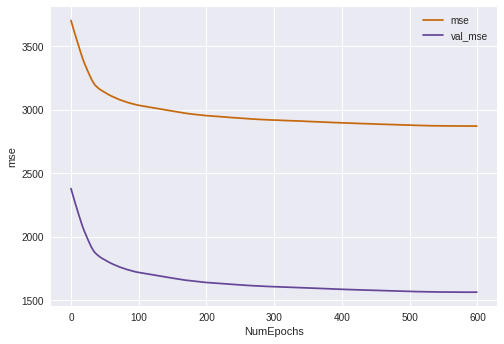

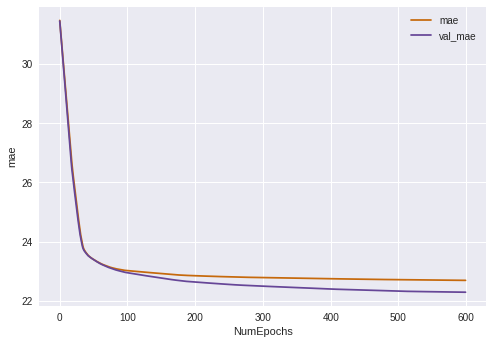

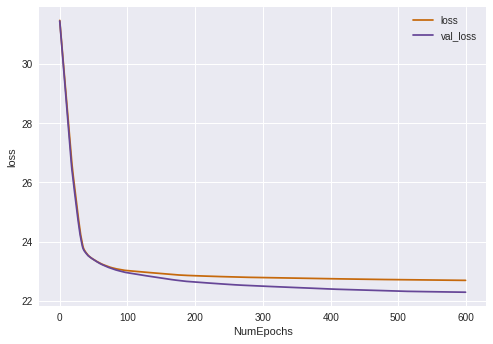

In [354]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [355]:
model.predict([1])

array([[23.38583]], dtype=float32)

In [356]:

print(f'Prediction for input value 1: {model.predict([1])}')
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[23.38583]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[23.38583 ]
 [35.08765 ]
 [46.789474]
 [58.491295]
 [70.193115]]

List of Predictions (flattened out):
[23.38583  35.08765  46.789474 58.491295 70.193115]



In [357]:
print(testFeatures)

     Survived
9           1
11          1
19          1
23          1
28          1
..        ...
858         1
865         1
867         0
871         1
874         1

[178 rows x 1 columns]


In [358]:
testPreds = model.predict(testFeatures).flatten()

In [359]:
print(len(testPreds))

print(testPreds)

178
[23.38583  23.38583  23.38583  23.38583  23.38583  23.38583  23.38583
 11.684008 11.684008 23.38583  23.38583  23.38583  11.684008 23.38583
 11.684008 11.684008 11.684008 23.38583  23.38583  11.684008 11.684008
 11.684008 11.684008 11.684008 23.38583  11.684008 11.684008 11.684008
 23.38583  23.38583  11.684008 11.684008 11.684008 11.684008 11.684008
 11.684008 23.38583  11.684008 11.684008 11.684008 11.684008 11.684008
 23.38583  23.38583  23.38583  11.684008 11.684008 11.684008 23.38583
 23.38583  11.684008 11.684008 23.38583  23.38583  23.38583  11.684008
 11.684008 23.38583  11.684008 23.38583  11.684008 11.684008 23.38583
 23.38583  23.38583  11.684008 11.684008 23.38583  23.38583  11.684008
 11.684008 23.38583  11.684008 23.38583  11.684008 23.38583  23.38583
 23.38583  11.684008 11.684008 11.684008 23.38583  23.38583  11.684008
 11.684008 11.684008 11.684008 11.684008 11.684008 23.38583  23.38583
 11.684008 23.38583  23.38583  11.684008 11.684008 11.684008 23.38583
 23.38583

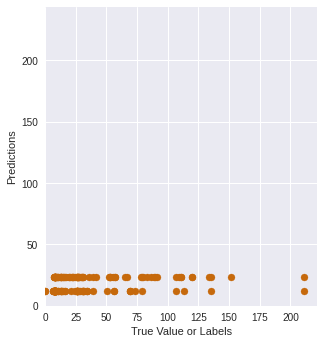

In [360]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

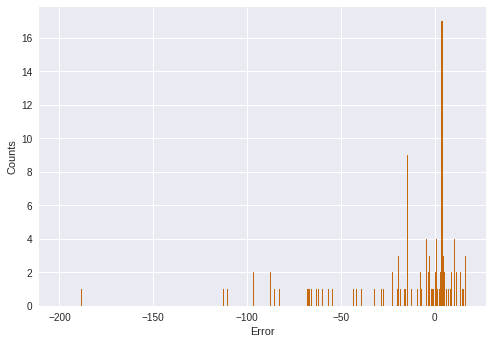

In [361]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)